# Let's explore Korean Demography 

### Importation of important packages 

In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from statsmodels.tsa.seasonal import seasonal_decompose

import os
for dirname, _, filenames in os.walk('/Users/theohallouin/Desktop/drive/My Drive/Project /Korean Demography'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

### Importation of the DataSet

In [28]:
df = pd.read_csv('/Users/theohallouin/Desktop/drive/My Drive/Project /Korean Demography /Korean_demographics_2000-2022.csv')
df.head()

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
0,1/1/2000,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
1,1/1/2000,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,1/1/2000,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
3,1/1/2000,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
4,1/1/2000,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2


### Exploration and explanation of the whole country Birth 

In [29]:
countrywide = df[df.Region == 'Whole country'].copy()

### Data Cleaning 

In [30]:
countrywide['Date_ts'] = pd.to_datetime(countrywide['Date'])
countrywide['Birth_ts']= countrywide['Birth'].astype(int)

In [31]:
countrywide_ts = countrywide[['Date_ts','Birth_ts']]
countrywide_ts.head()

,Date_ts,Birth_ts
17,2000-01-01,61644
35,2000-02-01,56723
53,2000-03-01,59878
71,2000-04-01,53058
89,2000-05-01,52492


In [32]:
countrywide_ts.isnull().sum()

Date_ts     0
Birth_ts    0
dtype: int64

In [33]:
countrywide_ts['Date_ts'].dt.year.head

<bound method NDFrame.head of 17      2000
35      2000
53      2000
71      2000
89      2000
        ... 
4787    2022
4805    2022
4823    2022
4841    2022
4859    2022
Name: Date_ts, Length: 270, dtype: int64>

In [34]:
data = countrywide_ts.set_index('Date_ts')
data.head()

,Birth_ts
Date_ts,
2000-01-01,61644
2000-02-01,56723
2000-03-01,59878
2000-04-01,53058
2000-05-01,52492


### How does the Birth Evolution looks like in Korea bewteen 2000 and 2022? 

<AxesSubplot: xlabel='Date_ts'>

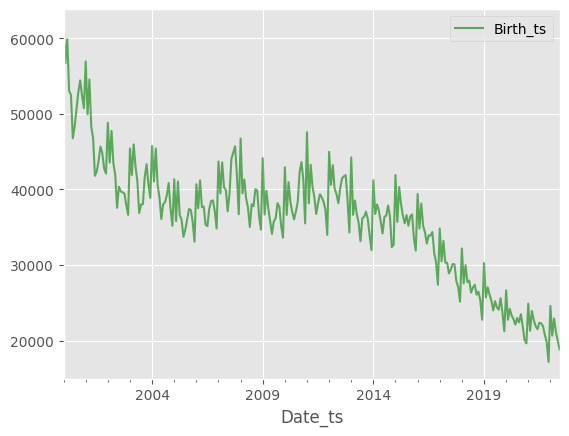

In [35]:
%matplotlib inline 

data.plot(grid='on', color = 'green', alpha = 0.6)

### Let's zoom in some random year 

<AxesSubplot: xlabel='Date_ts'>

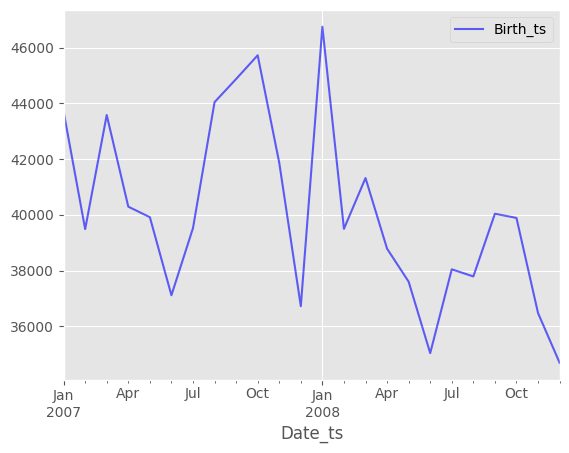

In [36]:
from datetime import datetime 

start_date = datetime(2007, 1, 1)
end_date = datetime (2008, 12, 1)
data[(start_date<=data.index) & (data.index<=end_date)].plot(grid='on', color = 'blue', alpha= 0.6)


### Decomposition of the Korean birth time serie 

In [37]:
import statsmodels.api as sm
start_date = datetime(2007, 1, 1)
end_date = datetime (2008, 12, 1)



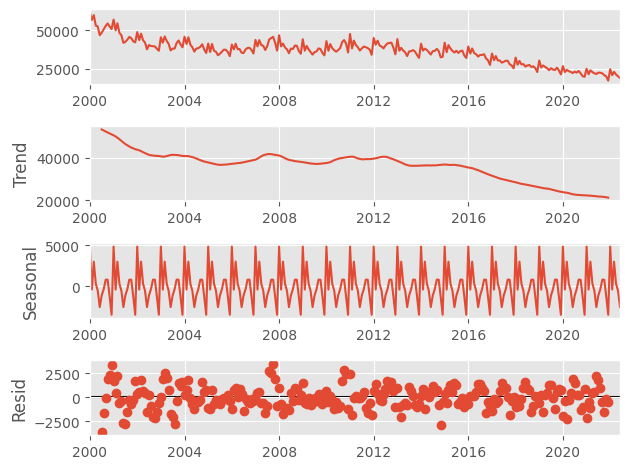

In [38]:
decomposition = sm.tsa.seasonal_decompose(data, model='additive')

fig = decomposition.plot()

### Let's zoom in to better understand the seasonality impact of birth in a year

<AxesSubplot: xlabel='Date_ts'>

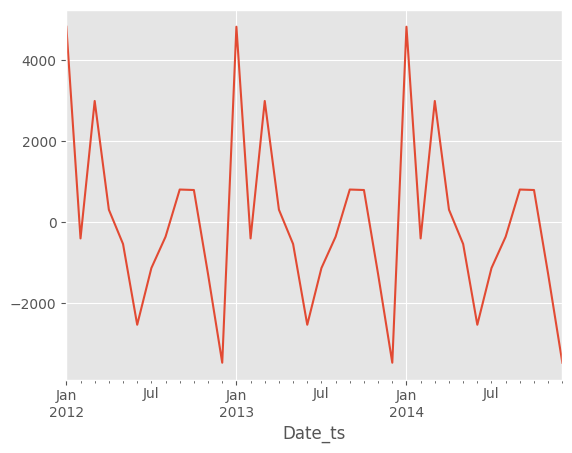

In [39]:
decomposition = sm.tsa.seasonal_decompose(data, model='additive')

season = decomposition.seasonal
start_date = datetime(2012, 1, 1)
end_date = datetime (2014, 12, 31)
season[(start_date<=data.index) & (data.index<=end_date)].plot()

### Mean of each composal 

In [40]:
seasonal_impact = decomposition.seasonal.mean()
seasonal_impact 

17.23328473224297

In [41]:
trend_impact = decomposition.trend.mean()
trend_impact

36065.820251937985

In [42]:
resid_impact = decomposition.resid.mean()
resid_impact

-4.781543109667026

##### The trend seems the most important composal of the birth, but we should not forget the seasonality since it still has an impact in a year. 

## When did Korea reach the breaking point ? 

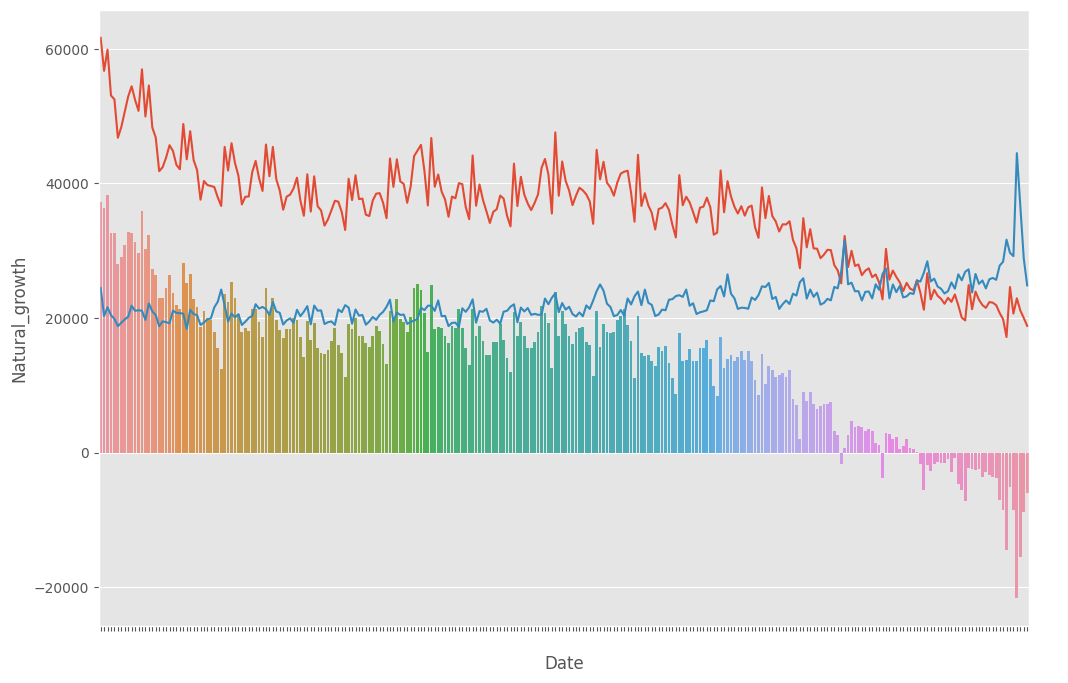

In [43]:
plt.figure(figsize=(12,8))

sns.lineplot(data=countrywide, x='Date', y='Birth')
sns.lineplot(data=countrywide, x='Date', y='Death')
sns.barplot(data=countrywide, x='Date', y='Natural_growth')

plt.xticks(color='w')
plt.show()

In [45]:
# rolling

countrywide['birth_rolling'] = countrywide['Birth'].rolling(12).mean()
countrywide['death_rolling'] = countrywide['Death'].rolling(12).mean()
countrywide['natural_growth_rolling'] = countrywide['Natural_growth'].rolling(12).mean()

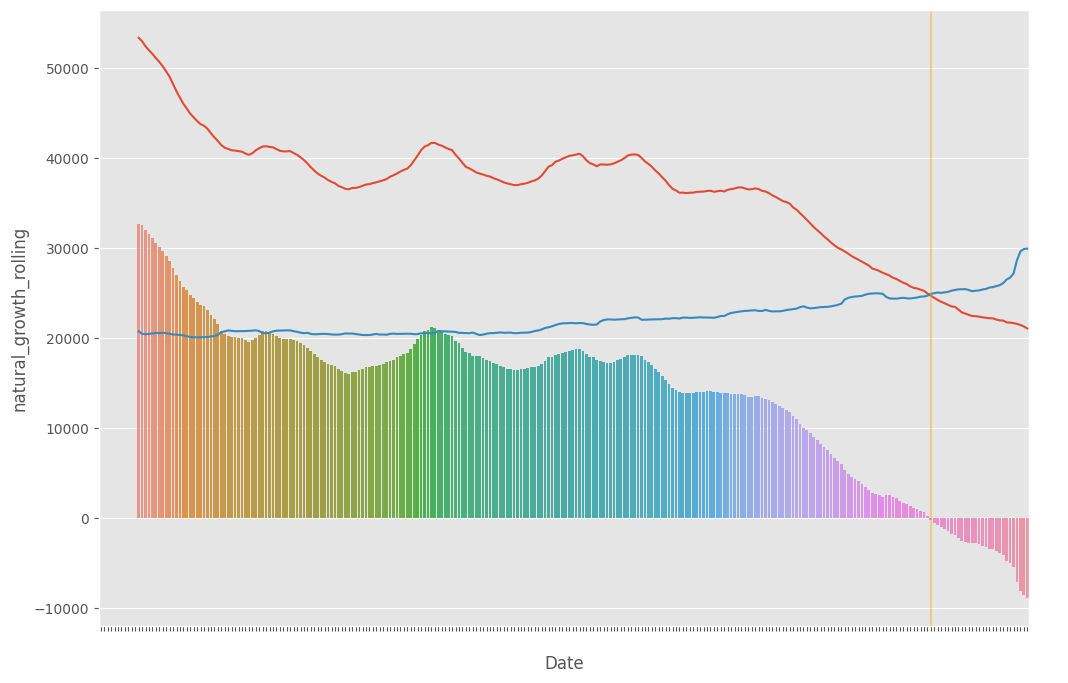

In [46]:
plt.figure(figsize=(12,8))

sns.lineplot(data=countrywide, x='Date', y='birth_rolling')
sns.lineplot(data=countrywide, x='Date', y='death_rolling')
sns.barplot(data=countrywide, x='Date', y='natural_growth_rolling')

# Find the year where the difference is equal to 0
country_bp = countrywide['Date'].where(countrywide['natural_growth_rolling'] <= 0).dropna().values[0]
# Draw a vertical line at the point where the number of births is equal to the number of deaths
plt.axvline(x=country_bp, color='orange', alpha = 0.4)

plt.xticks(color='w')
plt.show()

In [47]:
country_bp

'2/1/2020'

##### On a rolling 12 months base, the breaking point where the death number met the birth number was the 1st of February 2020. Those data describe the demography of the entire country, but maybe some regions didn't reach this point. 

#### To proceed, let's first find the breaking point and plot it for Seoul, and then we'll do the rest with a loop to save some time 

## Seoul 

In [48]:
seoul = df[df.Region == 'Seoul'].copy()

In [49]:
seoul['birth_smoothing'] = seoul['Birth'].rolling(12).mean()
seoul['death_smoothing'] = seoul['Death'].rolling(12).mean()
seoul['natural_growth_smoothing'] = seoul['Natural_growth'].rolling(12).mean()

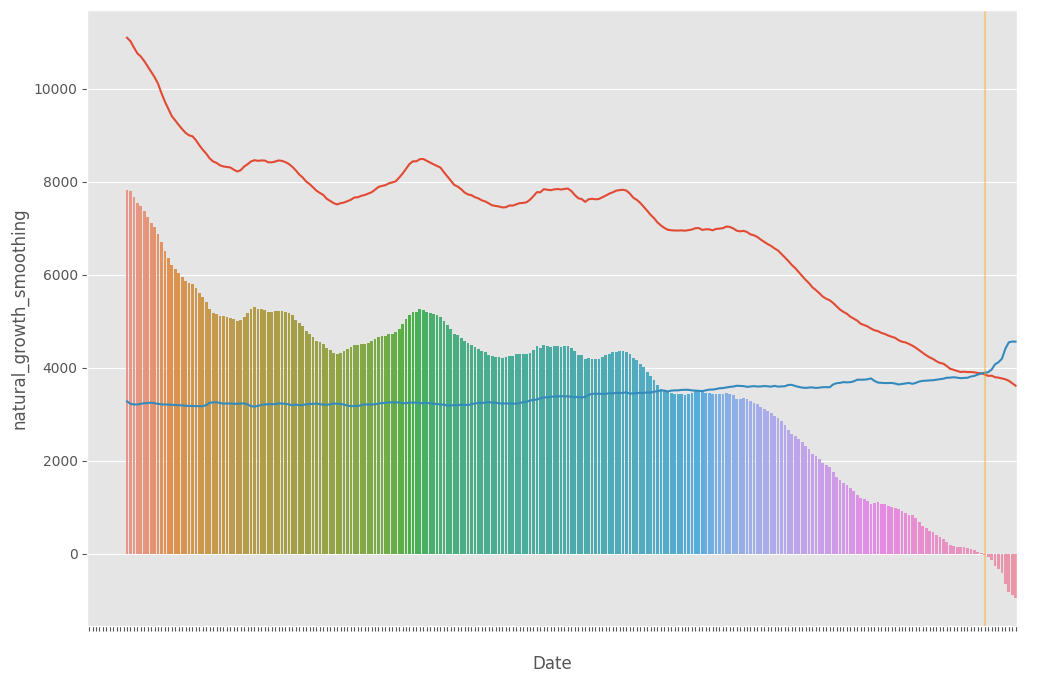

In [50]:
plt.figure(figsize=(12,8))

sns.lineplot(data=seoul, x='Date', y='birth_smoothing')
sns.lineplot(data=seoul, x='Date', y='death_smoothing')
sns.barplot(data=seoul, x='Date', y='natural_growth_smoothing')


# Find the year where the difference is equal to 0
seoul_bp = seoul['Date'].where(seoul['natural_growth_smoothing'] <= 0).dropna().values[0]
# Draw a vertical line at the point where the number of births is equal to the number of deaths
plt.axvline(x=seoul_bp, color='orange', alpha = 0.4)

plt.xticks(color='w')
plt.show()

In [51]:
seoul_bp

'9/1/2021'

#### The breaking point of Seoul was later than the Country average, let's see for the other regions by creating a loop 

In [52]:
df.Region.unique()

array(['Busan', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Daegu',
       'Daejeon', 'Gangwon-do', 'Gwangju', 'Gyeonggi-do',
       'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Incheon', 'Jeju',
       'Jeollabuk-do', 'Jeollanam-do', 'Sejong', 'Seoul', 'Ulsan',
       'Whole country'], dtype=object)

In [53]:
pd.options.mode.chained_assignment = None 

Regions = ['Busan', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Daegu',
       'Daejeon', 'Gangwon-do', 'Gwangju', 'Gyeonggi-do',
       'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Incheon', 'Jeju',
       'Jeollabuk-do', 'Jeollanam-do', 'Sejong', 'Seoul', 'Ulsan',
       'Whole country']  

for Region in Regions: 
    data_for_Region = df[df['Region'] == Region]
     


    data_for_Region_bp = data_for_Region['Date'].where(data_for_Region['Natural_growth']<=0).dropna().values[0]
    
    list_bp = print(Region), print(data_for_Region_bp)

Busan
12/1/2016
Chungcheongbuk-do
12/1/2014
Chungcheongnam-do
12/1/2002
Daegu
12/1/2016
Daejeon
12/1/2018
Gangwon-do
12/1/2005
Gwangju
12/1/2018
Gyeonggi-do
11/1/2021
Gyeongsangbuk-do
12/1/2002
Gyeongsangnam-do
12/1/2016
Incheon
12/1/2019
Jeju
12/1/2018
Jeollabuk-do
12/1/2005
Jeollanam-do
10/1/2002
Sejong
1/1/2012
Seoul
12/1/2018
Ulsan
11/1/2020
Whole country
12/1/2017
